In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import pytz

In [2]:

dataset = pd.read_csv('C:/Users/aggelosuser/Desktop/predictive_maintenance/datasets/test10.csv', parse_dates=True)


In [3]:
dataset

,signal,time,value
0,FAIL_SYNCHW,2022-12-16T08:37:22.827,0.000000
1,FAIL_RTU,2022-12-16T08:37:22.827,0.000000
2,LINK_MOTFEC0,2022-12-16T08:37:22.827,0.000000
3,FAIL_SYNC1,2022-12-16T08:37:22.827,0.000000
4,FAIL_SYNC2,2022-12-16T08:37:22.827,0.000000
...,...,...,...
413452,RTU_HEALTH,2023-04-08T05:12:59.744,3.000000
413453,MEM_USAGE,2023-04-08T05:12:59.744,25.280952
413454,CPU_USAGE,2023-04-08T05:12:59.744,6.083650
413455,PS1_V,2023-04-08T05:12:59.744,5.383530


In [5]:

dataset_final = dataset.pivot_table(values='value', index=['time'], columns=['signal'], aggfunc=np.sum, sort=False, fill_value=np.nan).reset_index()

dataset_final 

C:\Users\aggelosuser\AppData\Local\Temp\ipykernel_46616\1031458864.py:1: FutureWarning: The provided callable <function sum at 0x00000204C11C9940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dataset_final = dataset.pivot_table(values='value', index=['time'], columns=['signal'], aggfunc=np.sum, sort=False, fill_value=np.nan).reset_index()


signal,time,FAIL_SYNCHW,FAIL_RTU,LINK_MOTFEC0,FAIL_SYNC1,FAIL_SYNC2,PLC_WARNING,FAIL_SYNCDESV,LINK_LNC2,DOING_WELL,...,LINK_LNC0,LINK_LNC1,WARN_PS1,FAIL_PS1,WARN_BAT,RTU_HEALTH,MEM_USAGE,CPU_USAGE,PS1_V,TEMP
0,2022-12-16T08:37:22.827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,9.558824,5.487059,29.687
1,2022-12-16T08:42:23.361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,11.235955,5.487059,29.687
2,2022-12-16T08:47:23.924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,15.129151,5.487059,29.687
3,2022-12-16T08:52:24.482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,12.549020,5.487059,29.687
4,2022-12-16T08:57:25.013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,12.790698,5.487059,29.687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,2023-04-08T04:52:58.344,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.280952,17.928287,5.383530,28.437
19806,2023-04-08T04:57:58.694,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.280952,6.374502,5.383530,28.437
19807,2023-04-08T05:02:59.049,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.280952,13.284133,5.383530,28.437
19808,2023-04-08T05:07:59.395,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.280952,12.307692,5.383530,28.437


In [6]:
dataset_final.columns.name = None

dataset_final

,time,FAIL_SYNCHW,FAIL_RTU,LINK_MOTFEC0,FAIL_SYNC1,FAIL_SYNC2,PLC_WARNING,FAIL_SYNCDESV,LINK_LNC2,DOING_WELL,...,LINK_LNC0,LINK_LNC1,WARN_PS1,FAIL_PS1,WARN_BAT,RTU_HEALTH,MEM_USAGE,CPU_USAGE,PS1_V,TEMP
0,2022-12-16T08:37:22.827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,9.558824,5.487059,29.687
1,2022-12-16T08:42:23.361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,11.235955,5.487059,29.687
2,2022-12-16T08:47:23.924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,15.129151,5.487059,29.687
3,2022-12-16T08:52:24.482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,12.549020,5.487059,29.687
4,2022-12-16T08:57:25.013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.208271,12.790698,5.487059,29.687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,2023-04-08T04:52:58.344,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.280952,17.928287,5.383530,28.437
19806,2023-04-08T04:57:58.694,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.280952,6.374502,5.383530,28.437
19807,2023-04-08T05:02:59.049,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.280952,13.284133,5.383530,28.437
19808,2023-04-08T05:07:59.395,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,25.280952,12.307692,5.383530,28.437


In [7]:
dataset_final.columns

Index(['time', 'FAIL_SYNCHW', 'FAIL_RTU', 'LINK_MOTFEC0', 'FAIL_SYNC1',
       'FAIL_SYNC2', 'PLC_WARNING', 'FAIL_SYNCDESV', 'LINK_LNC2', 'DOING_WELL',
       'FAIL_CONF', 'FAIL_PLC', 'LINK_LNC0', 'LINK_LNC1', 'WARN_PS1',
       'FAIL_PS1', 'WARN_BAT', 'RTU_HEALTH', 'MEM_USAGE', 'CPU_USAGE', 'PS1_V',
       'TEMP'],
      dtype='object')

In [ ]:
# Convert 'date' column to datetime format
dataset_final['time'] = pd.to_datetime(dataset_final['time'])
#dataset_final['time'] = dataset_final['time'].replace(tzinfo=pytz.utc)
#.dt.tz_localize(None)
dataset_final.set_index('time', inplace=True)
dataset_final

In [18]:
dataset_final.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
CPU_USAGE,16717.0,31.771785,24.324220,2.247191,8.267717,25.882353,60.074627,90.000000
DOING_WELL,16778.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FAIL_CONF,16775.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAIL_PLC,16767.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAIL_PS1,16745.0,0.000060,0.007728,0.000000,0.000000,0.000000,0.000000,1.000000
FAIL_RTU,16549.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAIL_SYNC1,16637.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FAIL_SYNC2,16673.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FAIL_SYNCDESV,16736.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAIL_SYNCHW,16542.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
dataset_final['WARN_PS1'].value_counts()

0.0    16753
1.0        2
Name: WARN_PS1, dtype: int64

<AxesSubplot:>

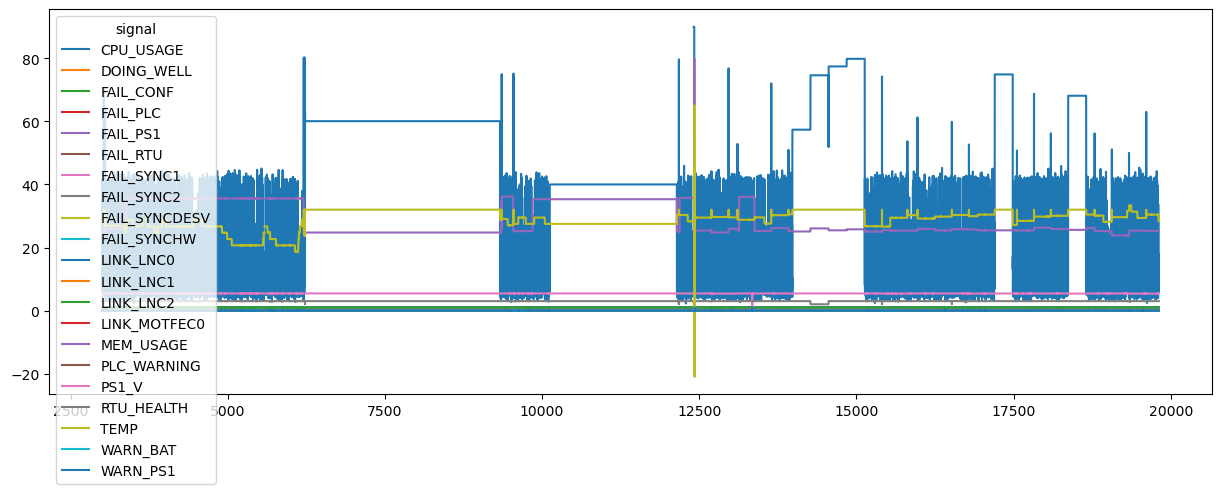

In [11]:
# Plot the timeseries data
#dataset_final.index = dataset_final.index.dt.tz_localize(None)
dataset_final=dataset_final.iloc[3000:]
dataset_final.plot(figsize=(15, 5))

In [35]:
dataset_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FAIL_SYNCHW,17385.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAIL_RTU,17393.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LINK_MOTFEC0,17437.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAIL_SYNC1,17489.0,0.951455,0.214921,0.000000,1.000000,1.000000,1.000000,1.000000
FAIL_SYNC2,17526.0,1.072692,16.038266,0.000000,1.000000,1.000000,1.000000,2124.000000
PLC_WARNING,17547.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAIL_SYNCDESV,17592.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LINK_LNC2,17617.0,1.120963,16.055265,1.000000,1.000000,1.000000,1.000000,2132.000000
DOING_WELL,17637.0,1.120996,16.068749,1.000000,1.000000,1.000000,1.000000,2135.000000
FAIL_CONF,17634.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
dataset_final = dataset_final.drop(["PS1_V","FAIL_SYNCHW","WARN_PS1", "WARN_BAT","FAIL_RTU", "FAIL_CONF", "FAIL_SYNC1","FAIL_SYNC2", "DOING_WELL", "FAIL_PLC", "FAIL_PS1", "PLC_WARNING", "FAIL_SYNCDESV", "LINK_MOTFEC0", "LINK_LNC0", "LINK_LNC1", "LINK_LNC2","RTU_HEALTH"], axis = 1)

In [38]:
dataset_final.replace(' ', np.nan, inplace=True)
dataset_final.replace('', np.nan, inplace=True)
dataset_final

,MEM_USAGE,CPU_USAGE,TEMP
time,,,
2022-12-16 08:37:22.827,25.208271,9.558824,29.687
2022-12-16 08:42:23.361,25.208271,11.235955,29.687
2022-12-16 08:47:23.924,25.208271,15.129151,29.687
2022-12-16 08:52:24.482,25.208271,12.549020,29.687
2022-12-16 08:57:25.013,25.208271,12.790698,29.687
...,...,...,...
2023-04-08 04:52:58.344,25.280952,17.928287,28.437
2023-04-08 04:57:58.694,25.280952,6.374502,28.437
2023-04-08 05:02:59.049,25.280952,13.284133,28.437


In [40]:
dataset_final = dataset_final.dropna()
print(dataset_final.shape)

(17519, 3)


In [13]:
#dataset_final = dataset_final.to_numpy()
dataset_final

,MEM_USAGE,CPU_USAGE,TEMP
time,,,
2022-12-16 08:37:22.827,25.208271,9.558824,29.687
2022-12-16 08:42:23.361,25.208271,11.235955,29.687
2022-12-16 08:47:23.924,25.208271,15.129151,29.687
2022-12-16 08:52:24.482,25.208271,12.549020,29.687
2022-12-16 08:57:25.013,25.208271,12.790698,29.687
...,...,...,...
2023-04-08 04:52:58.344,25.280952,17.928287,28.437
2023-04-08 04:57:58.694,25.280952,6.374502,28.437
2023-04-08 05:02:59.049,25.280952,13.284133,28.437


In [16]:
print(dataset_final.to_string())

                            MEM_USAGE  CPU_USAGE     PS1_V    TEMP
time                                                              
2023-01-20 10:33:47.793000  26.505572   6.800000  0.000000  28.250
2023-01-20 10:38:48.198000  26.505572   7.200000  0.000000  28.250
2023-01-20 10:43:48.604000  26.505572  42.000000  0.000000  28.250
2023-01-20 10:53:49.446000  26.505572  14.960630  0.000000  28.250
2023-01-20 10:58:49.858000  26.505572   9.225092  0.000000  28.250
2023-01-20 11:03:50.255000  26.505572  18.215613  0.000000  28.250
2023-01-20 11:08:50.650000  26.505572  23.461538  0.000000  28.250
2023-01-20 11:13:51.054000  26.505572  10.980392  0.000000  28.250
2023-01-20 11:18:51.462000  26.505572  21.245421  0.000000  28.250
2023-01-20 11:23:51.884000  26.505572   8.800000  0.000000  28.250
2023-01-20 11:33:52.723000  26.505572  26.415094  0.000000  28.250
2023-01-20 11:38:53.157000  26.505572   8.301887  0.000000  28.250
2023-01-20 11:43:53.564000  26.505572  10.980392  0.000000  28

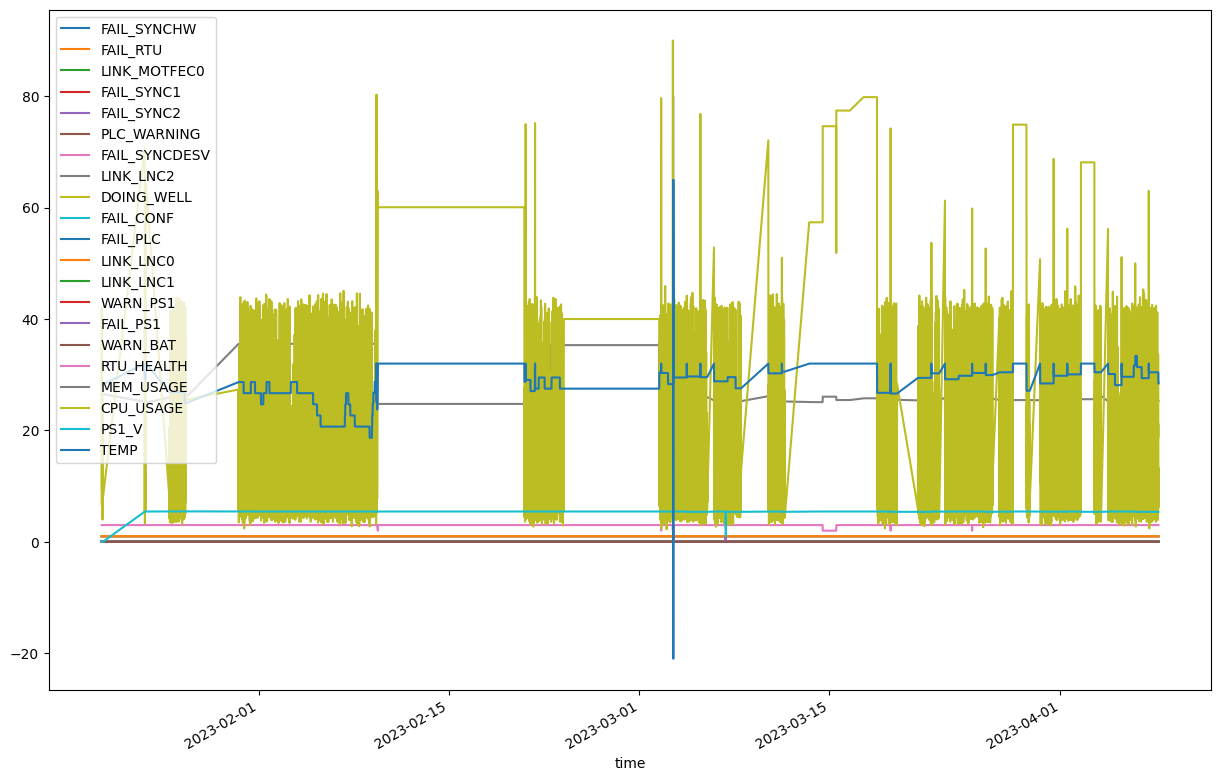

In [23]:
dataset_final.plot(figsize=(15, 10))
plt.show()

<AxesSubplot: xlabel='time'>

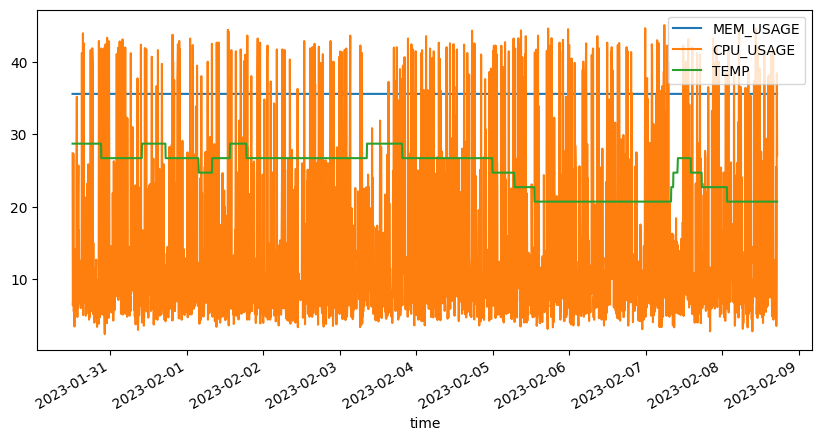

In [41]:
dataset_final.loc[(dataset_final.index > pd.to_datetime('01-30-2023 00:00:00')) & (dataset_final.index < pd.to_datetime('02-08-2023 17:18:00'))].plot(figsize=(10,5))

In [64]:
part2=dataset_final.loc[(dataset_final.index > pd.to_datetime('03-02-2023 11:27:00')) & (dataset_final.index < pd.to_datetime('03-11-2023 17:01:00'))]

(19418.015692454283, 19428.16759447859, -26.55, 95.55)

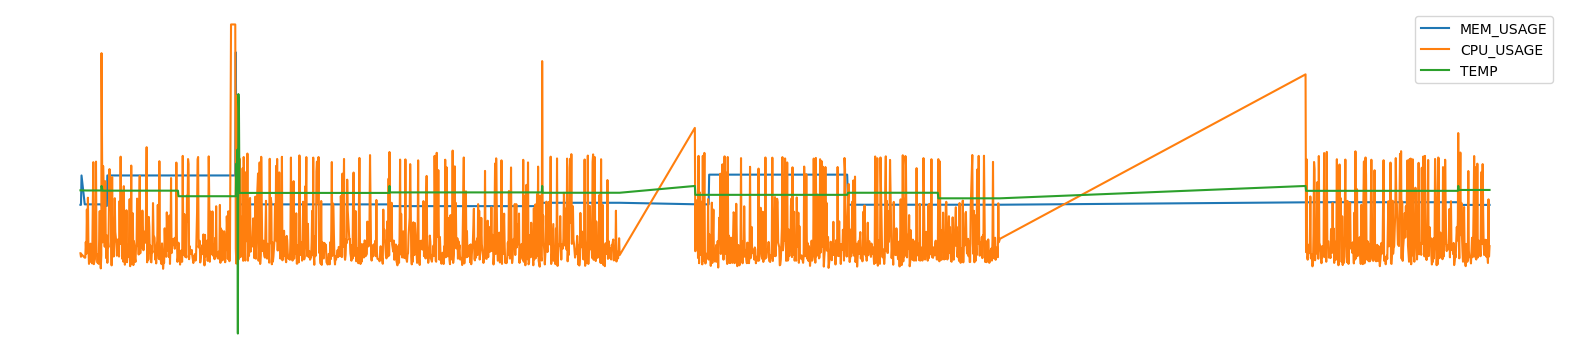

In [65]:
# create figures
#fig, ax = plt.subplots(2, 1, figsize=(8, 8))
part2.plot(figsize=(20,5)).axis('off')

In [42]:
part1=dataset_final.loc[(dataset_final.index > pd.to_datetime('01-30-2023 00:00:00')) & (dataset_final.index < pd.to_datetime('02-09-2023 15:18:00'))]

<AxesSubplot: xlabel='time'>

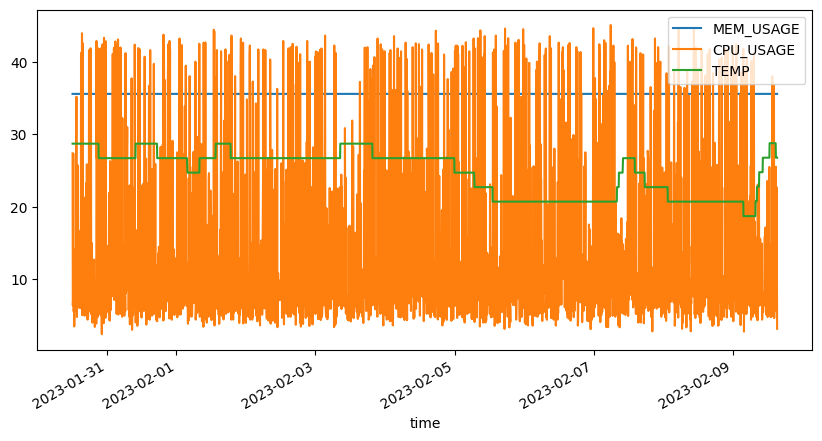

In [43]:
part1.plot(figsize=(10,5))

In [237]:
dataset_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MEM_USAGE,11592.0,30.265218,5.237903,24.413479,24.755779,26.160928,35.555417,80.000000
CPU_USAGE,11584.0,34.046770,22.859059,2.247191,10.000000,40.000000,60.074627,90.000000
PS1_V,11584.0,5.418756,0.271808,0.000000,5.435294,5.435294,5.435294,5.461176
TEMP,11574.0,28.664626,3.272441,-21.000000,27.500000,28.812000,32.000000,65.000000


In [42]:
dataset_final = dataset_final.dropna()

In [159]:
dataset_final.to_csv(r'C:/Users/aggelosuser/Desktop/kdep/terminet/dataset/schneider/small_labeled.csv', index = False) #header = False

In [20]:
dataset_final.to_csv(r'C:/Users/aggelosuser/Desktop/test9after.csv', index = False) #header = False

In [45]:
part1.to_csv(r'C:/Users/aggelosuser/Desktop/part1.csv', index = True) #header = False
#part2.to_csv(r'C:/Users/aggelosuser/Desktop/part2.csv', index = True) #header = False